In [1]:
import pandas as pd
import numpy as np

# PART 1: US Census Data - 
## Make a scatterplot that shows average income in a state vs proportion of women in that state

### Task 1: 
The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

In [2]:
df_states0 = pd.read_csv('Assignment/states0.csv')
df_states5 = pd.read_csv('Assignment/states5.csv')
df_states9 = pd.read_csv('Assignment/states9.csv')
display(df_states0)

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F


### Task 2:
It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [2]:
import glob

# defining files path using glob
path = 'Assignment'
files = glob.glob(path + '/states*.csv') # to make sure any other irrelevant file such as inventory.csv is not uploaded

# looping through files to upload
statesList = []
for f in files:
    temp_df = pd.read_csv(f)
    statesList.append(temp_df)
    print(f'Successfully created dataframe for {f} with shape {temp_df.shape}')

# concatenating dataframes into one.
us_census = pd.concat(statesList, axis=0)
print(us_census.shape)

# Dropping the Unnamed Column, reindexing to count of elements and naming the index
us_census.drop(columns =['Unnamed: 0'], inplace = True)
us_census.index = range(len(us_census.index))
us_census.index.name='Index'
us_census.head(10)

Successfully created dataframe for Assignment\states0.csv with shape (6, 11)
Successfully created dataframe for Assignment\states1.csv with shape (6, 11)
Successfully created dataframe for Assignment\states2.csv with shape (6, 11)
Successfully created dataframe for Assignment\states3.csv with shape (6, 11)
Successfully created dataframe for Assignment\states4.csv with shape (6, 11)
Successfully created dataframe for Assignment\states5.csv with shape (6, 11)
Successfully created dataframe for Assignment\states6.csv with shape (6, 11)
Successfully created dataframe for Assignment\states7.csv with shape (6, 11)
Successfully created dataframe for Assignment\states8.csv with shape (6, 11)
Successfully created dataframe for Assignment\states9.csv with shape (6, 11)
(60, 11)


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
Index,,,,,,,,,,
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
6,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
7,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
8,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F


### Task 3: 
Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [3]:
print(us_census.dtypes)
print(us_census.columns) # check for Histogram

State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object
Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')


### Task 4: 
Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

In [4]:
us_census.head() # retrieving top 5 records 

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
Index,,,,,,,,,,
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


### Task 5:
Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [5]:
us_census['Income'] = us_census['Income'].replace('[\$,]', '', regex=True).astype(float)
print(us_census['Income'].iloc[0], us_census['Income'].dtypes)
us_census.head(1)

43296.35860306644 float64


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
Index,,,,,,,,,,
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F


### Task 6:
Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.

In [6]:
us_census[['GenderPop_M','GenderPop_F']] = us_census.GenderPop.str.split("_",expand=True) 

# Dropping old unified GenderPop column 
us_census.drop(columns =['GenderPop'], inplace = True) 
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop_M,GenderPop_F
Index,,,,,,,,,,,
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M,1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M,19334329F


### Task 7:
Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.

In [7]:
us_census['GenderPop_M'] = us_census['GenderPop_M'].replace('M', '', regex=True)
us_census['GenderPop_F'] = us_census['GenderPop_F'].replace('F', '', regex=True)
us_census['GenderPop_M'] =pd.to_numeric(us_census['GenderPop_M'])
us_census['GenderPop_F'] =pd.to_numeric(us_census['GenderPop_F'])
print("Columns with Missing Values:")
print(us_census.isnull().sum(), us_census.dtypes)
us_census.head()

Columns with Missing Values:
State          0
TotalPop       0
Hispanic       0
White          0
Black          0
Native         0
Asian          0
Pacific        5
Income         0
GenderPop_M    0
GenderPop_F    3
dtype: int64 State           object
TotalPop         int64
Hispanic        object
White           object
Black           object
Native          object
Asian           object
Pacific         object
Income         float64
GenderPop_M      int64
GenderPop_F    float64
dtype: object


,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop_M,GenderPop_F
Index,,,,,,,,,,,
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093,2489527.0
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160,349215.0
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088,3342840.0
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913,1506295.0
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135,19334329.0


### Task 9:
Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [8]:
FPoP_Missing = us_census['GenderPop_F'].isnull()
print("Total Missing values in Women Population Column:",FPoP_Missing.sum())

select_index = np.array(np.where(FPoP_Missing==True)).tolist()
print("\n List of missing States:")
for i in select_index:
    x= us_census['State'].iloc[i] 
    print(x)
    
print(us_census[['State','GenderPop_F']]) # Women Population State wise

us_census['GenderPop_F'] = us_census['TotalPop'] - us_census['GenderPop_M'] # filling in the missing Women Population
print(us_census[['State','GenderPop_F']])

Total Missing values in Women Population Column: 3

 List of missing States:
Index
23    Maryland
24    Maryland
31     Montana
Name: State, dtype: object
                      State  GenderPop_F
Index                                   
0                   Alabama    2489527.0
1                    Alaska     349215.0
2                   Arizona    3342840.0
3                  Arkansas    1506295.0
4                California   19334329.0
5                  Colorado    2630239.0
6                  Colorado    2630239.0
7               Connecticut    1841615.0
8                  Delaware     478041.0
9      District of Columbia     340810.0
10                  Florida   10045763.0
11                  Georgia    5123362.0
12                  Georgia    5123362.0
13                   Hawaii     696428.0
14                    Idaho     806083.0
15                 Illinois    6556862.0
16                  Indiana    3333382.0
17                     Iowa    1558931.0
18                     Io

### Task 10:
We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.

In [9]:
print(us_census['State'][us_census.duplicated()])

Index
6         Colorado
12         Georgia
18            Iowa
24        Maryland
30        Missouri
36      New Jersey
42            Ohio
48    Rhode Island
54            Utah
Name: State, dtype: object


### Taske 11:
Drop those duplicates using the .drop_duplicates() function.

In [10]:
print("before removale of duplicates, DataFrame Shape:", us_census.shape)
us_census.drop_duplicates(keep='first',inplace=True,ignore_index=True) 
us_census.shape


before removale of duplicates, DataFrame Shape: (60, 11)


(51, 11)

### Task 12: Scatterplot 
Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.
### Task 8: Scatterplot 
Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!

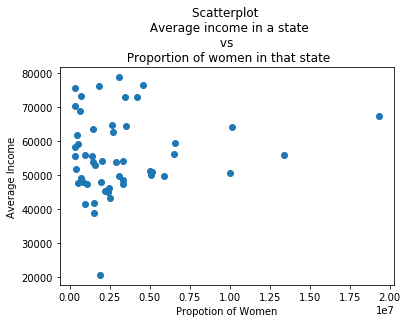

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Scatterplot \n Average income in a state\n vs \n Proportion of women in that state")
plt.xlabel("Propotion of Women")
plt.ylabel("Average Income")
plt.scatter(us_census['GenderPop_F'], us_census['Income']) 
plt.show()

### Task 13: Histograms of Races
Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [777]:
us_census.columns[2:8]

Index(['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific'], dtype='object')

### Task 14:
Try to make a histogram for each one! i.e. each race

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.


In [12]:
us_census['Hispanic'] = us_census['Hispanic'].replace('[\%]', '', regex=True)
us_census['Hispanic'] =pd.to_numeric(us_census['Hispanic'])
us_census['White'] = us_census['White'].replace('[\%]', '', regex=True)
us_census['White'] =pd.to_numeric(us_census['White'])
us_census['Black'] = us_census['Black'].replace('[\%]', '', regex=True)
us_census['Black'] =pd.to_numeric(us_census['Black'])
us_census['Native'] = us_census['Native'].replace('[\%]', '', regex=True)
us_census['Native'] =pd.to_numeric(us_census['Native'])
us_census['Asian'] = us_census['Asian'].replace('[\%]', '', regex=True)
us_census['Asian'] =pd.to_numeric(us_census['Asian'])
us_census['Pacific'] = us_census['Pacific'].replace('[\%]', '', regex=True)
us_census['Pacific'] =pd.to_numeric(us_census['Pacific'])
print("Missing values filled with NaN :")
display(us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].isnull().sum())
display(us_census[["Hispanic","White","Black","Native","Asian","Pacific"]].dtypes)
print("Checking for duplicate values :")
print(us_census[us_census.duplicated()])

Missing values filled with NaN :


Hispanic    0
White       0
Black       0
Native      0
Asian       0
Pacific     4
dtype: int64

Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
dtype: object

Checking for duplicate values :
Empty DataFrame
Columns: [State, TotalPop, Hispanic, White, Black, Native, Asian, Pacific, Income, GenderPop_M, GenderPop_F]
Index: []


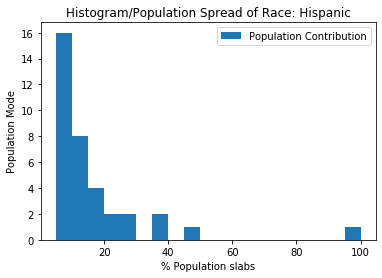

In [13]:
slabs=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100] # self created bins
plt.title("Histogram/Population Spread of Race: Hispanic")
plt.hist(us_census['Hispanic'],slabs,
                    histtype='bar',
                    # rwidth=0.8,
                     label='Population Contribution')
plt.xlabel("% Population slabs")
plt.ylabel("Population Mode")
plt.legend()
plt.show()

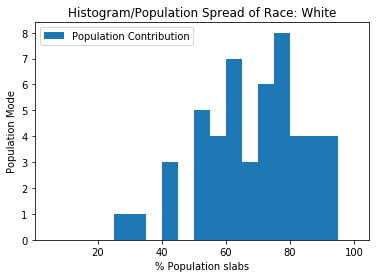

In [1080]:
slabs=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100] # self created bins
plt.title("Histogram/Population Spread of Race: White")
plt.hist(us_census['White'],slabs,
                    histtype='bar',
                    # rwidth=0.8,
                     label='Population Contribution')
plt.xlabel("% Population slabs")
plt.ylabel("Population Mode")
plt.legend()
plt.show()

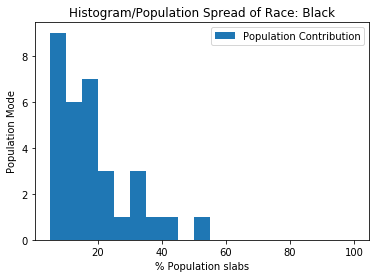

In [1081]:
slabs=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100] # self created bins
plt.title("Histogram/Population Spread of Race: Black")
plt.hist(us_census['Black'],slabs,
                    histtype='bar',
                    # rwidth=0.8,
                     label='Population Contribution')
plt.xlabel("% Population slabs")
plt.ylabel("Population Mode")
plt.legend()
plt.show()

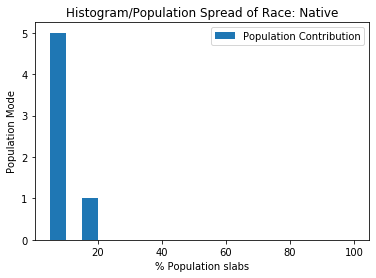

In [1082]:
slabs=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100] # self created bins
plt.title("Histogram/Population Spread of Race: Native")
plt.hist(us_census['Native'],slabs,
                    histtype='bar',
                    # rwidth=0.8,
                     label='Population Contribution')
plt.xlabel("% Population slabs")
plt.ylabel("Population Mode")
plt.legend()
plt.show()

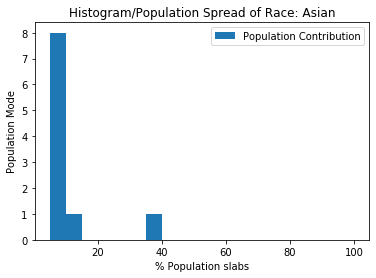

In [1083]:
slabs=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100] # self created bins
plt.title("Histogram/Population Spread of Race: Asian")
plt.hist(us_census['Asian'],slabs,
                    histtype='bar',
                    # rwidth=0.8,
                     label='Population Contribution')
plt.xlabel("% Population slabs")
plt.ylabel("Population Mode")
plt.legend()
plt.show()

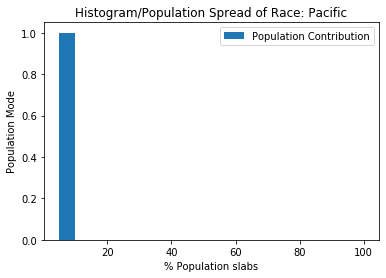

In [1084]:
us_census['Pacific'].fillna(us_census['Pacific'].mean())
slabs=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100] # self created bins
plt.title("Histogram/Population Spread of Race: Pacific")
plt.hist(us_census['Pacific'],slabs,
                    histtype='bar',
                    # rwidth=0.8,
                     label='Population Contribution')
plt.xlabel("% Population slabs")
plt.ylabel("Population Mode")
plt.legend()
plt.show()

### Task 15: Get Creative
Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

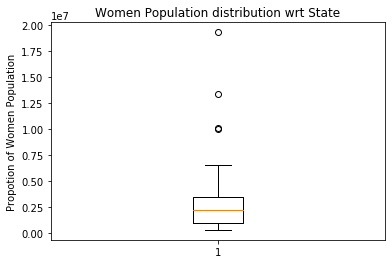

In [1091]:
plt.title("Women Population distribution wrt State")
plt.ylabel("Propotion of Women Population")
plt.boxplot(us_census['GenderPop_F'])
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e8dd730ac8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e8dd72b548>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e8dd746248>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e8dd746288>}

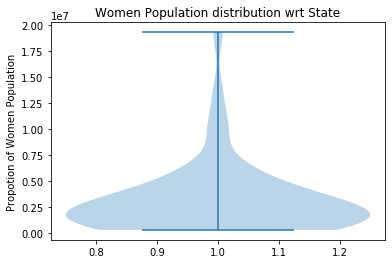

In [1094]:
plt.title("Women Population distribution wrt State")
plt.ylabel("Propotion of Women Population")
plt.violinplot(us_census['GenderPop_F'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e8dd5ee288>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e8dd679808>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e8dd624648>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e8dd624f08>}

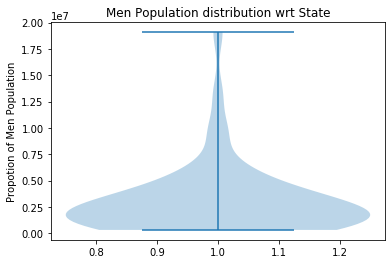

In [1095]:
plt.title("Men Population distribution wrt State")
plt.ylabel("Propotion of Men Population")
plt.violinplot(us_census['GenderPop_M'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x1e8dd445d48>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x1e8dd4a4648>,
 'cmins': <matplotlib.collections.LineCollection at 0x1e8dd479f08>,
 'cbars': <matplotlib.collections.LineCollection at 0x1e8dd416548>}

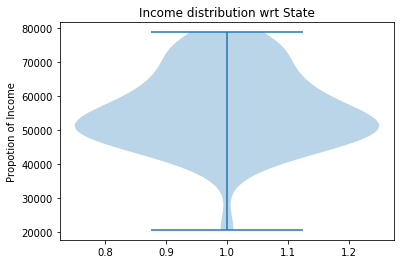

In [1096]:
plt.title("Income distribution wrt State")
plt.ylabel("Propotion of Income")
plt.violinplot(us_census['Income'])

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop_M', 'GenderPop_F'],
      dtype='object')
56030858 195737797 42356656 2240493 15094367 477303


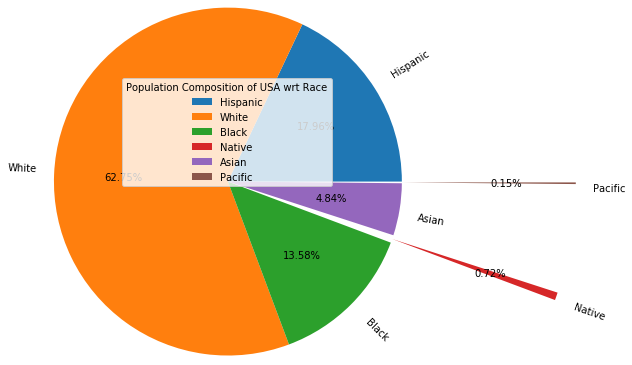

In [34]:
print(us_census.columns)
Hispanic=((((us_census['Hispanic'])/100)*us_census['TotalPop']).sum()).astype(int)
White=((((us_census['White'])/100)*us_census['TotalPop']).sum()).astype(int)
Black=((((us_census['Black'])/100)*us_census['TotalPop']).sum()).astype(int)
Native=((((us_census['Native'])/100)*us_census['TotalPop']).sum()).astype(int)
Asian=((((us_census['Asian'])/100)*us_census['TotalPop']).sum()).astype(int)
Pacific=((((us_census['Pacific'])/100)*us_census['TotalPop']).sum()).astype(int)
print(Hispanic,White,Black,Native,Asian,Pacific)
Population_Race = [Hispanic, White, Black, Native, Asian, Pacific]
legend= ['Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific']
explode = (0, 0, 0, 2,0,2) 
plt.pie(Population_Race,radius=2, explode=explode, labels = legend,autopct='%1.2f%%',rotatelabels=True)
plt.legend(title = "Population Composition of USA wrt Race")
plt.show()

# PART 1: Petal Power Inventory - 
## You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!

### Task 1:
Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.

In [841]:
inventory = pd.read_csv('Assignment/inventory.csv')
print("DataFrame Shape: ",inventory.shape,'\n')
print("DataFrame Columns: ",inventory.columns,'\n')
print("DataFrame Columns DataTypes : \n",inventory.dtypes,'\n')
inventory['location']=inventory.location.astype("string")
inventory['product_type']=inventory['product_type'].astype("string")
inventory['product_description']=inventory['product_description'].astype("string")
print("DataFrame Columns DataTypes after conversion : \n",inventory.dtypes,'\n')
print("Checking for missing/null values :")
print(inventory.isnull().sum()) # checking for null values
print("Checking for duplicate records :")
print(inventory.duplicated().sum())

DataFrame Shape:  (29, 5) 

DataFrame Columns:  Index(['location', 'product_type', 'product_description', 'quantity', 'price'], dtype='object') 

DataFrame Columns DataTypes : 
 location                object
product_type            object
product_description     object
quantity                 int64
price                  float64
dtype: object 

DataFrame Columns DataTypes after conversion : 
 location                string
product_type            string
product_description     string
quantity                 int64
price                  float64
dtype: object 

Checking for missing/null values :
location               0
product_type           0
product_description    0
quantity               0
price                  0
dtype: int64
Checking for duplicate records :
0


### Task 2:
Inspect the first 10 rows of inventory.


In [810]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


### Task 3:
The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.

In [813]:
staten_island = pd.DataFrame(inventory.loc[0:9])
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


### Task 4:
A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.

In [844]:
product_request = staten_island['product_description']
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

### Task 5:
Another customer emails to ask what types of seeds are sold at the Brooklyn location.

Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

In [849]:
seed_request = inventory[(inventory['location'] =='Brooklyn') & (inventory['product_type'] == 'seeds')]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


### Task 6:
Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.

In [858]:
inventory['in_stock']=pd.Series(np.where(inventory['quantity'] > 0,True,False))
inventory

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


### Task 7:
Petal Power wants to know how valuable their current inventory is.

Create a column called total_value that is equal to price multiplied by quantity.

In [860]:
inventory['total_value'] = inventory.price * inventory.quantity
inventory.head()

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00


### Task 8:
The Marketing department wants a complete description of each product for their catalog.

The following lambda function combines product_type and product_description into a single string:

combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)
Paste this function into script.py.

In [1012]:
%run "script.py"

### Task 9:
Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.

In [1018]:
desc_list = []
for i in range(len(inventory.index)):
    desc_list.append(combine_lambda(inventory.iloc[i]))
inventory['full_description'] = pd.Series(desc_list)
inventory.tail()

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
24,Queens,garden tools,wheelbarrow,98,89.99,True,8819.02,garden tools - wheelbarrow
25,Queens,garden tools,spade,26,19.99,True,519.74,garden tools - spade
26,Queens,pest_control,insect killer,0,12.99,False,0.00,pest_control - insect killer
27,Queens,pest_control,weed killer,16,23.99,True,383.84,pest_control - weed killer
28,Queens,planter,20 inch terracotta planter,87,17.99,True,1565.13,planter - 20 inch terracotta planter
